In [52]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from deep_visual_odometry.kitti_utils import KITTIdata
from matplotlib import pyplot as plt

In [53]:
basedir = 'dataset'

In [54]:
from deep_visual_odometry.odometry_model import OdomModel

In [55]:
batch_size = 256         # Sequences per batch
num_steps = 8         # Number of sequence steps per batch
rnn_size = 64          # Size of hidden layers in rnn_cell
num_layers = 2           # Number of hidden layers
learning_rate = 0.001

In [56]:
kitti_data = KITTIdata(basedir, 
                       sequences = ['00', '01'],
                       sequence_len = num_steps,
                       val_frac = 0,
                       test_frac = 0,
                       img_size=(150,50))

completed load sequence 00 data
completed load sequence 01 data


In [57]:
kitti_data.normalize()

normalized data


In [58]:
inputs, inter_inputs, targets = kitti_data.get_series_batch_train(batch_size = 256)

In [63]:
model = OdomModel(batch_size = 256, 
                  num_steps = 8,
                  cell_type = 'GRU',
                  rnn_size = 128,
                  num_layers = 2,
                  learning_rate = 0.001)
model.train(kitti_data, max_count = 250, save_every_n = 1000, sequences = ['00'])

output size (256, 8, 128)
seq_output shape (256, 8, 128)
shape of outputs (256, 8, 3)
shape of targets (256, 8, 3)
step: 5  loss: 0.4266  0.5623 sec/batch
step: 10  loss: 0.4138  0.5595 sec/batch
step: 15  loss: 0.3614  0.5585 sec/batch
step: 20  loss: 0.3186  0.5598 sec/batch
step: 25  loss: 0.2962  0.5581 sec/batch
step: 30  loss: 0.2769  0.5641 sec/batch
step: 35  loss: 0.2464  0.5604 sec/batch
step: 40  loss: 0.2269  0.5638 sec/batch
step: 45  loss: 0.2158  0.5577 sec/batch
step: 50  loss: 0.2075  0.5621 sec/batch
step: 55  loss: 0.1938  0.5641 sec/batch
step: 60  loss: 0.1806  0.6598 sec/batch
step: 65  loss: 0.1836  0.5993 sec/batch
step: 70  loss: 0.1807  0.5618 sec/batch
step: 75  loss: 0.1622  0.5632 sec/batch
step: 80  loss: 0.1607  0.5688 sec/batch
step: 85  loss: 0.1549  0.5779 sec/batch
step: 90  loss: 0.1474  0.5660 sec/batch
step: 95  loss: 0.1431  0.6097 sec/batch
step: 100  loss: 0.1474  0.5825 sec/batch
step: 105  loss: 0.1461  0.6027 sec/batch
step: 110  loss: 0.1351

In [16]:
#inputs_test, interinputs_test, targets_test = kitti_data.load_all_sequences(mode = 'train', sequences = ['01'])

In [64]:
model = OdomModel(batch_size = 256, 
                  num_steps = 8,
                  cell_type = 'GRU',
                  rnn_size = 128,
                  num_layers = 2,
                  learning_rate = 0.001,
                  sampling = True)

output size (1, 1, 128)
seq_output shape (1, 1, 128)
shape of outputs (1, 1, 3)
shape of targets (1, 1, 3)


In [75]:
inputs, inter_inputs, targets = kitti_data.get_full_sequence(sequence = '01')
inter_inputs.shape

(1100, 5)

In [89]:
checkpoint = tf.train.latest_checkpoint('checkpoints')
predictions = model.test(checkpoint, inter_inputs, priming_len = 100)
predictions.shape

INFO:tensorflow:Restoring parameters from checkpoints/i251_l128.ckpt


(1100, 3)

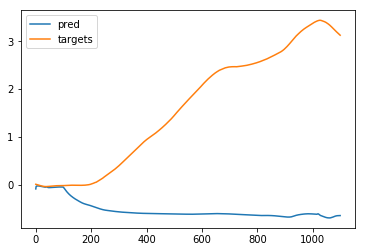

In [90]:
i = 0
j = 1
plt.plot(predictions[:,j],label = 'pred')
plt.plot(targets[:,j],label = 'targets')
plt.legend()
plt.show()